In [104]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb
import tensorflow as tf 
import sklearn

In [105]:
dataset = pd.read_csv("Housing.csv")

In [106]:
dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [107]:
dataset.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [108]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [109]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### Encoding multiple columns at the same time 

In [110]:
from sklearn.preprocessing import LabelEncoder 

In [111]:
lb = LabelEncoder()

In [112]:
cols = {
    "mainroad" : ["yes" , "no"] , 
    "guestroom" : ["yes" , "no"] , 
    "basement" : ["yes" , "no"] , 
    "hotwaterheating" : ["yes" , "no"] ,
    "airconditioning" : ["yes" , "no"] , 
    "prefarea" : ["yes" , "no"] , 
    "furnishingstatus" :["furnished" , "semi-furnished" , "unfurnished"] 
    }

cols_to_encode=["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea","furnishingstatus" ]

for column in cols_to_encode:
        dataset[column] = lb.fit_transform(dataset[column])

print(dataset)
    

        price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420         4          2        3         1          0   
1    12250000  8960         4          4        4         1          0   
2    12250000  9960         3          2        2         1          0   
3    12215000  7500         4          2        2         1          0   
4    11410000  7420         4          1        2         1          1   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000         2          1        1         1          0   
541   1767150  2400         3          1        1         0          0   
542   1750000  3620         2          1        1         1          0   
543   1750000  2910         3          1        1         0          0   
544   1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0           0                0           

In [113]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()

# dataset= sc.fit_transform(dataset)

In [114]:
# dataset = pd.DataFrame(dataset)

In [115]:
dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [116]:
dataset.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [117]:
# dataset.columns = ["price","area","bedrooms","bathrooms","stories","mainroad","guestroom","basement","hotwaterheating","airconditioning","parking","prefarea","furnishingstatus"]

In [119]:
dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


# Exploratory Data Analysis 

In [120]:
correlation = dataset.corr()

In [121]:
correlation 

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,-0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,-0.171445
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,-0.123244
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,-0.143559
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.104672
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,-0.156726
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,-0.118328
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,-0.112831
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.031628
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,-0.150477


<Axes: >

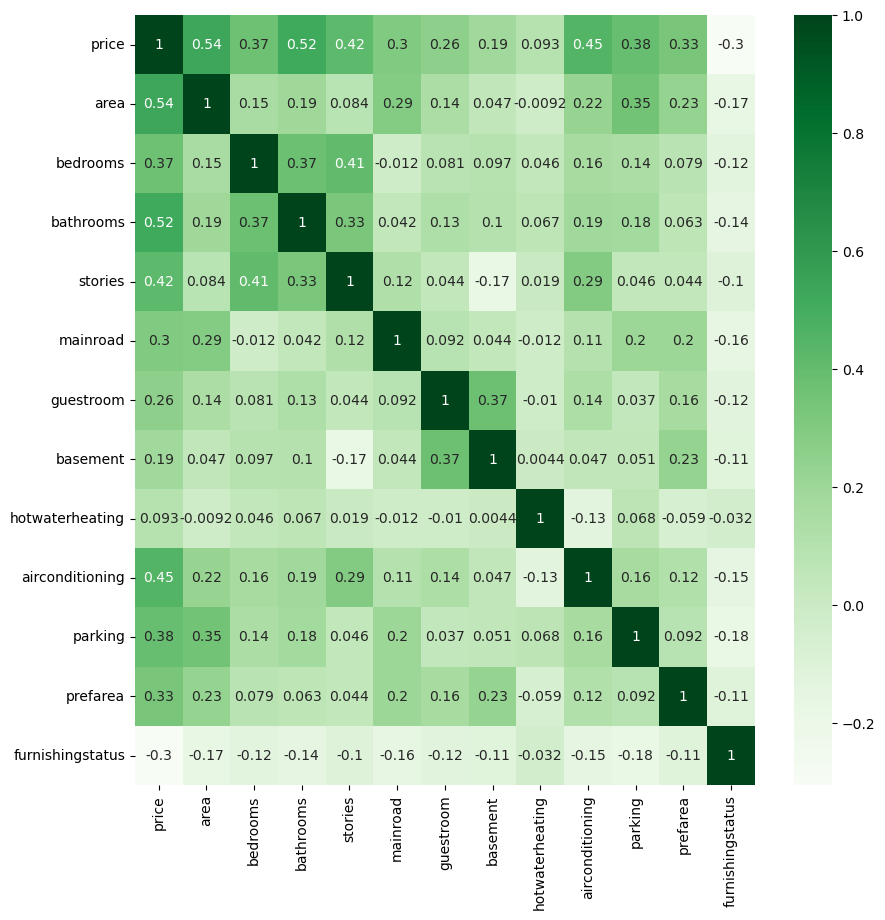

In [122]:
plt.figure(figsize=(10,10))
sb.heatmap(correlation , cbar =True , cmap = "Greens" , annot = True)

In [123]:
# # plt.figure(figsize=(10,6))
# for column in range(1,12):
#     plt.hist(dataset, bins = 10 , alpha = 0.5 , label = column ,edgecolor = "black")
# plt.xlabel('Value')
# plt.ylabel('Frequency')
# plt.title('Multiple Histograms Together')
# plt.legend(loc='upper right')
# plt.show()

Text(45.06947222222222, 0.5, 'price')

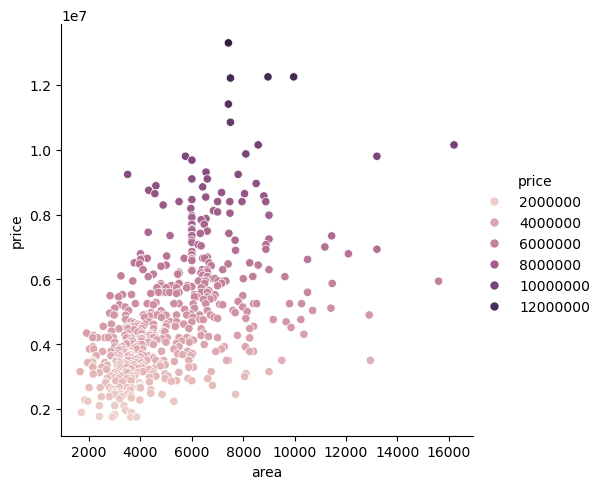

In [124]:
sb.relplot(x=dataset.area, y = dataset.price, hue ="price" , data = dataset)
plt.xlabel('area')
plt.ylabel('price')

Text(45.06947222222222, 0.5, 'price')

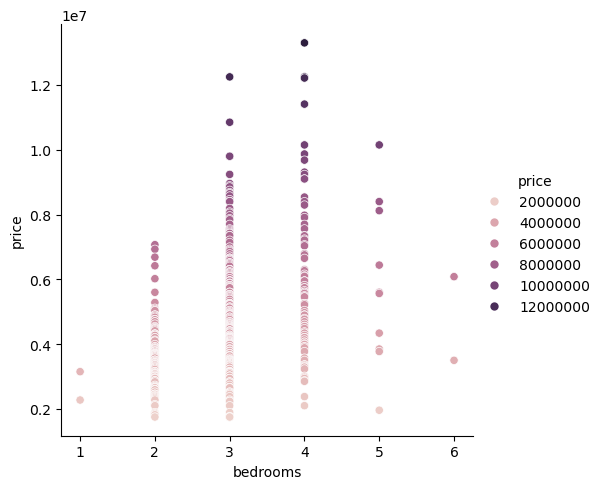

In [125]:
sb.relplot(x=dataset.bedrooms, y = dataset.price, hue ="price" , data = dataset)
plt.xlabel('bedrooms')
plt.ylabel('price')

# Model Training 

In [136]:
col = ["area" ,"bathrooms","bedrooms" , "stories","parking","price"]
cdf = dataset[col]

In [137]:
cdf

,area,bathrooms,bedrooms,stories,parking,price
0,7420,2,4,3,2,13300000
1,8960,4,4,4,3,12250000
2,9960,2,3,2,2,12250000
3,7500,2,4,2,3,12215000
4,7420,1,4,2,2,11410000
...,...,...,...,...,...,...
540,3000,1,2,1,2,1820000
541,2400,1,3,1,0,1767150
542,3620,1,2,1,0,1750000
543,2910,1,3,1,0,1750000


# Scaling

In [141]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cdf = pd.DataFrame(scaler.fit_transform(cdf),columns = cdf.columns)

### determine x and y

In [143]:
x = cdf.drop(columns="price" , axis=1)
y = cdf["price"]

## Train-Test-Split

In [144]:
from sklearn.model_selection import train_test_split

In [145]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.3, random_state = 2)

In [146]:
print(x_train , y_train ,x_test , y_test)

         area  bathrooms  bedrooms   stories   parking
166  0.422680        0.0       0.4  0.000000  0.666667
378  0.042955        0.0       0.4  0.666667  0.000000
349  0.217869        0.0       0.4  0.333333  0.000000
368  0.274227        0.0       0.2  0.000000  0.000000
306  0.219244        0.0       0.4  0.333333  0.333333
..        ...        ...       ...       ...       ...
299  0.367698        0.0       0.4  0.000000  1.000000
534  0.092784        0.0       0.6  0.333333  0.000000
493  0.158763        0.0       0.4  0.000000  0.000000
527  0.012784        0.0       0.2  0.000000  0.000000
168  0.179381        0.0       0.6  0.333333  0.000000

[381 rows x 5 columns] 166    0.309091
378    0.163636
349    0.175758
368    0.166667
306    0.209091
         ...   
299    0.212121
534    0.030303
493    0.090909
527    0.045455
168    0.303030
Name: price, Length: 381, dtype: float64          area  bathrooms  bedrooms   stories   parking
333  0.092784   0.000000       0.4  0.333333

## 1. Linear regression model

In [147]:
from sklearn.linear_model import LinearRegression 

In [176]:
lr = LinearRegression()

#### Using cross validation to evaluate our model 

In [153]:
# from sklearn.model_selection import cross_val_score , cross_val_predict
# cv_scores = cross_val_score(lr, x_train , y_train , cv=5 ,scoring="r2")
# cv_scores

In [154]:
# print(f'The cross-validated accuracy is:{np.mean(cv_scores)*100}')

the closer they are to 0 the better the model is 

In [156]:
# cv_scores = cross_val_score(lr, x_train , y_train , cv=5 ,scoring="neg_mean_squared_error")
# cv_scores

LinearRegression()

# Final Model

In [157]:
x_test

,area,bathrooms,bedrooms,stories,parking
333,0.092784,0.000000,0.4,0.333333,0.000000
84,0.145017,0.000000,0.4,0.333333,0.666667
439,0.156701,0.000000,0.2,0.000000,0.000000
396,0.136770,0.000000,0.2,0.000000,0.333333
161,0.305842,0.000000,0.4,0.666667,0.000000
...,...,...,...,...,...
117,0.140893,0.000000,0.6,0.333333,0.000000
314,0.164261,0.000000,0.2,0.333333,0.333333
340,0.250859,0.333333,0.8,0.333333,0.000000
444,0.101031,0.000000,0.4,0.333333,0.000000


In [158]:
y_test

333    0.187879
84     0.412121
439    0.130303
396    0.151515
161    0.321212
         ...   
117    0.363636
314    0.203030
340    0.181818
444    0.127273
307    0.209091
Name: price, Length: 164, dtype: float64

In [178]:
lr.fit(x_train,y_train)

LinearRegression()

In [160]:
y_test_predictions = lr.predict(x_test)

# Evaluating our model

In [163]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [168]:
MSE = mean_squared_error(y_test_predictions,y_test)
print("Mean sqauare error =",MSE)

Mean sqauare error = 0.012153094405361995


In [169]:
MAE = mean_absolute_error(y_test_predictions , y_test)
print("Mean absolute error = ", MAE)

Mean absolute error =  0.079023252084935


# 2. XG Boost Regressor()

In [174]:
from xgboost import XGBRegressor

In [180]:
model = XGBRegressor()


# Final model

In [182]:
model.fit(x_train , y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [183]:
y_test_predictions = model.predict(x_test)

### Evaluating the model

In [184]:
MSE = mean_squared_error(y_test_predictions,y_test)
print("Mean sqauare error =",MSE)

Mean sqauare error = 0.023453321878824245


In [185]:
MAE = mean_absolute_error(y_test_predictions , y_test)
print("Mean absolute error = ", MAE)

Mean absolute error =  0.10803826212949076


# 3. Using Tensorflow 

In [187]:
X_arr = x.values
Y_arr = y.values

In [190]:
X_train , X_test , Y_train , Y_test = train_test_split(X_arr , Y_arr , test_size = 0.01 , shuffle=True ,random_state=1)


print("X_train shape:",X_train.shape)
print("Y_train shape:",Y_train.shape)
print("X_test shape:",X_test.shape)
print("Y_test shape:",Y_test.shape)

X_train shape: (539, 5)
Y_train shape: (539,)
X_test shape: (6, 5)
Y_test shape: (6,)


## Create a model

In [248]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

def get_model():

    model = Sequential([
        Dense(10,input_shape=(5,),activation="relu"),
        Dense(20 , activation="relu"),
        Dense(5 , activation="sigmoid"),
        Dense(1)
    ])

    model.compile(
        loss="mse" ,
        optimizer="adadelta"
    )

    return model

In [249]:
MODEL = get_model()
MODEL.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 10)                60        
                                                                 
 dense_33 (Dense)            (None, 20)                220       
                                                                 
 dense_34 (Dense)            (None, 5)                 105       
                                                                 
 dense_35 (Dense)            (None, 1)                 6         
                                                                 
Total params: 391
Trainable params: 391
Non-trainable params: 0
_________________________________________________________________


## Model training 

In [250]:
MODEL = get_model()

# this prediction is before training the model
preds_on_untrained = MODEL.predict(X_test)

1/1 [==============================] - 0s 162ms/step


In [251]:
# train model and store in the object history
history = MODEL.fit(X_train , Y_train , validation_data=(X_test , Y_test),epochs=1000)

Epoch 1/1000
17/17 [==============================] - 1s 28ms/step - loss: 0.7941 - val_loss: 0.8196
Epoch 2/1000
17/17 [==============================] - 0s 7ms/step - loss: 0.7938 - val_loss: 0.8193
Epoch 3/1000
17/17 [==============================] - 0s 6ms/step - loss: 0.7936 - val_loss: 0.8191
Epoch 4/1000
17/17 [==============================] - 0s 6ms/step - loss: 0.7933 - val_loss: 0.8188
Epoch 5/1000
17/17 [==============================] - 0s 7ms/step - loss: 0.7931 - val_loss: 0.8186
Epoch 6/1000
17/17 [==============================] - 0s 6ms/step - loss: 0.7928 - val_loss: 0.8183
Epoch 7/1000
17/17 [==============================] - 0s 7ms/step - loss: 0.7926 - val_loss: 0.8180
Epoch 8/1000
17/17 [==============================] - 0s 7ms/step - loss: 0.7923 - val_loss: 0.8178
Epoch 9/1000
17/17 [==============================] - 0s 6ms/step - loss: 0.7921 - val_loss: 0.8175
Epoch 10/1000
17/17 [==============================] - 0s 7ms/step - loss: 0.7918 - val_loss: 0.817

# Predictions 

In [252]:
predictions = MODEL.predict(X_test)

1/1 [==============================] - 0s 48ms/step


## Evaluating the model

In [253]:
evaluation = MODEL.evaluate(X_test , Y_test)

1/1 [==============================] - 0s 39ms/step - loss: 0.2364


## PLotting the loss graph

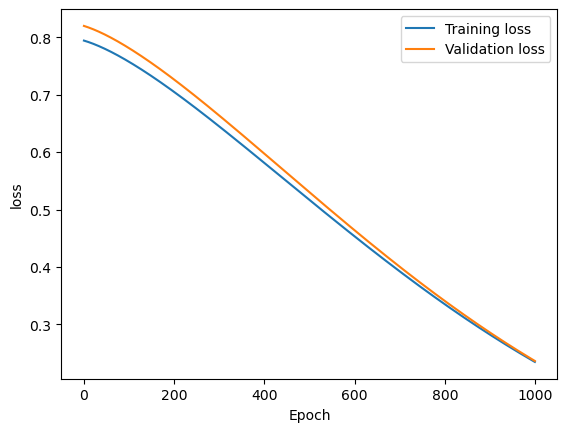

In [254]:
plt.plot(history.history["loss"],label="Training loss")
plt.plot(history.history["val_loss"] , label="Validation loss")
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.legend()
plt.show()